# Federated Statistics with MONAI

Run using NVFlare's simulator:

### 1. Download the Spleen Bundle

In [1]:
# Assume data was already downloaded following the README in spleen_ct_segmentation example
%env DATA_DIR=./data
%env JOB_NAME=job_stats
!python3 -m monai.bundle download --name "spleen_ct_segmentation_v0.2.0" --bundle_dir ../${JOB_NAME}/app/config

env: DATA_DIR=./data
env: JOB_NAME=job_stats
2022-10-13 11:28:08,101 - INFO - --- input summary of monai.bundle.scripts.download ---
2022-10-13 11:28:08,101 - INFO - > name: 'spleen_ct_segmentation_v0.2.0'
2022-10-13 11:28:08,101 - INFO - > bundle_dir: '../job_stats/app/config'
2022-10-13 11:28:08,101 - INFO - > source: 'github'
2022-10-13 11:28:08,101 - INFO - > repo: 'Project-MONAI/model-zoo/hosting_storage_v1'
2022-10-13 11:28:08,101 - INFO - > progress: True
2022-10-13 11:28:08,101 - INFO - ---


2022-10-13 11:28:08,101 - INFO - Expected md5 is None, skip md5 check for file ../job_stats/app/config/spleen_ct_segmentation_v0.2.0.zip.
2022-10-13 11:28:08,101 - INFO - File exists: ../job_stats/app/config/spleen_ct_segmentation_v0.2.0.zip, skipped downloading.
2022-10-13 11:28:08,101 - INFO - Writing into directory: ../job_stats/app/config.


### 2. Download the data

Download the spleen CT data from the [MSD challenge](http://medicaldecathlon.com/) and update data path.

In [2]:
!echo "Downloading data to ${DATA_DIR}"
!python3 ../download_spleen_dataset.py -f "${DATA_DIR}/Task09_Spleen.tar" -o "${DATA_DIR}"
!sed -i "s|/workspace/data/Task09_Spleen|${PWD}/../data/Task09_Spleen|g" ../${JOB_NAME}/app/config/spleen_ct_segmentation/configs/train.json

2022-10-13 11:28:12,284 - INFO - Expected md5 is None, skip md5 check for file data/Task09_Spleen.tar.
2022-10-13 11:28:12,284 - INFO - File exists: data/Task09_Spleen.tar, skipped downloading.
2022-10-13 11:28:12,284 - INFO - Non-empty folder exists in data/Task09_Spleen, skipped extracting.


In [3]:
import os
from nvflare.private.fed.app.simulator.simulator_runner import SimulatorRunner    

job_name = os.environ["JOB_NAME"]

simulator = SimulatorRunner(
    job_folder=f"../{job_name}",
    workspace="./",
    n_clients=2,
    threads=2,
    gpu="0,1"
)
run_status = simulator.run()
print("Simulator finished with run_status", run_status)

2022-10-13 11:28:13,860 - SimulatorRunner - INFO - When running with multi GPU, each GPU will run with only 1 thread. Set the Threads to 1.
2022-10-13 11:28:13,865 - SimulatorRunner - INFO - Create the Simulator Server.
2022-10-13 11:28:13,950 - nvflare.fuel.hci.server.hci - INFO - Starting Admin Server localhost on Port 47375
2022-10-13 11:28:13,955 - SimulatorServer - INFO - starting insecure server at localhost:38349
2022-10-13 11:28:13,997 - SimulatorRunner - INFO - Deploy the Apps.
2022-10-13 11:28:14,242 - SimulatorRunner - INFO - Create the simulate clients.
2022-10-13 11:28:14,290 - ClientManager - INFO - Client: New client site-1@127.0.0.1 joined. Sent token: 4339866f-3269-4b6c-8a59-186b88486ec5.  Total clients: 1
2022-10-13 11:28:14,296 - FederatedClient - INFO - Successfully registered client:site-1 for project simulator_server. Token:4339866f-3269-4b6c-8a59-186b88486ec5 SSID:
2022-10-13 11:28:14,327 - ClientManager - INFO - Client: New client site-2@127.0.0.1 joined. Sent t

### 3. Plot the results
First, we show the results as table:

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { !important; }</style>"))

from nvflare.app_opt.statistics.visualization.statistics_visualization import Visualization

In [5]:
with open('./simulate_job/statistics/image_statistics.json', 'r') as f:
    data = json.load(f)

In [6]:
vis = Visualization()
vis.show_stats(data = data)


Intensity



,count,histogram
site-2-train#dataset#data,32,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
site-2-validate#dataset#data,9,"[[-200.0, -195.0, 50513], [-195.0, -190.0, 496..."
site-2-total_data,41,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
site-1-train#dataset#data,32,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
site-1-validate#dataset#data,9,"[[-200.0, -195.0, 50513], [-195.0, -190.0, 496..."
site-1-total_data,41,"[[-200.0, -195.0, 496658], [-195.0, -190.0, 47..."
Global-train#dataset#data,64,"[[-200.0, -195.0, 993316], [-195.0, -190.0, 95..."
Global-validate#dataset#data,18,"[[-200.0, -195.0, 101026], [-195.0, -190.0, 99..."
Global-total_data,82,"[[-200.0, -195.0, 993316], [-195.0, -190.0, 95..."


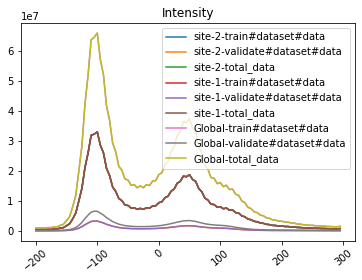

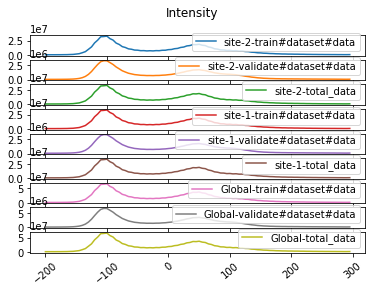

In [7]:
vis.show_histograms(data=data, display_format="sample_count", plot_type="both")

For better comparison between clients' data, show the histograms using normalized counts:

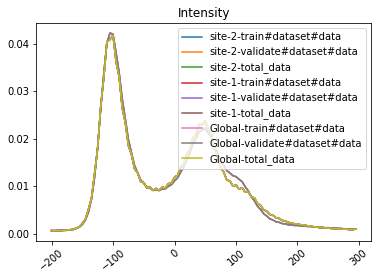

In [8]:
vis.show_histograms(data=data, display_format="percent", plot_type="main")
plt.savefig("histogram_main.png")

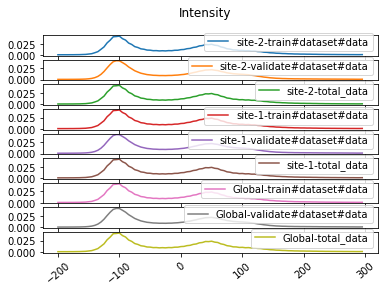

In [9]:
vis.show_histograms(data=data, display_format="percent", plot_type="subplot")
plt.savefig("histogram_subplot.png")